# Visualizing Symbolic Transformation Lineage in DSKYpoly

This notebook demonstrates how to represent and visualize symbolic transformation nodes and their ancestry using Python. We use NetworkX and Matplotlib for graph visualization, and Pandas for tabular display.

In [1]:
# Import Required Libraries
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Define the SymbolicNode Class
class SymbolicNode:
    def __init__(
        self,
        name: str,
        symbol: str,
        branch: str,
        ancestry: list = None,
        depth: int = 0,
        annotation: str = "",
        metadata: dict = None
    ):
        self.name = name
        self.symbol = symbol
        self.branch = branch
        self.ancestry = ancestry if ancestry else []
        self.depth = depth
        self.annotation = annotation
        self.metadata = metadata if metadata else {}

    def add_child(self, child_node):
        child_node.ancestry.append(self)

    def __repr__(self):
        return (
            f"{self.symbol} {self.name} [{self.branch}] "
            f"(Depth: {self.depth}) - {self.annotation}"
        )

In [3]:
# Create Example SymbolicNode Instances
quartic_node = SymbolicNode(
    name="Quartic Symmetry",
    symbol="🧊",
    branch="Algebraic Spine",
    ancestry=[],
    depth=0,
    annotation="Layered, but navigable."
)

quintic_node = SymbolicNode(
    name="Quintic Collapse",
    symbol="🧨",
    branch="Galois",
    ancestry=[quartic_node],
    depth=1,
    annotation="The mirror fractures—recursion deepens."
)

strange_loop_node = SymbolicNode(
    name="Strange Loop",
    symbol="🔁",
    branch="Recursive",
    ancestry=[quintic_node],
    depth=2,
    annotation="Self-referential descent into unsolvability."
)

nodes = [quartic_node, quintic_node, strange_loop_node]

/home/tjpools/assembly-projects/DSKYpoly/.venv/lib64/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129482 (\N{ICE CUBE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/tjpools/assembly-projects/DSKYpoly/.venv/lib64/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129512 (\N{FIRECRACKER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/tjpools/assembly-projects/DSKYpoly/.venv/lib64/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


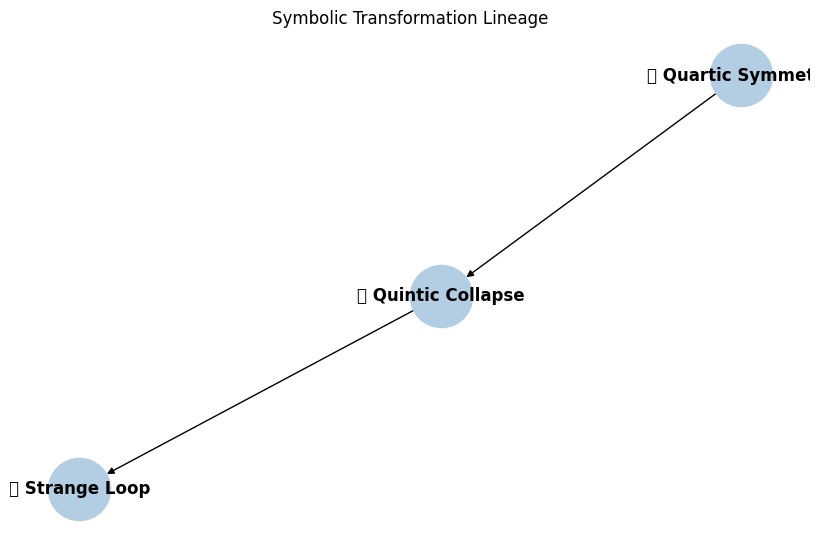

In [4]:
# Visualize Node Lineage with NetworkX and Matplotlib
G = nx.DiGraph()

# Add nodes and edges
for node in nodes:
    G.add_node(node.name, symbol=node.symbol, depth=node.depth, annotation=node.annotation)
    for parent in node.ancestry:
        G.add_edge(parent.name, node.name)

# Draw graph
plt.figure(figsize=(8, 5))
pos = nx.spring_layout(G, seed=42)
labels = {n: f"{G.nodes[n]['symbol']} {n}" for n in G.nodes}
nx.draw(G, pos, with_labels=True, labels=labels, node_size=2000, node_color="#b3cde3", font_size=12, font_weight="bold")
plt.title("Symbolic Transformation Lineage")
plt.show()

In [5]:
# Display Node Attributes in a Table
node_data = [{
    "Name": node.name,
    "Symbol": node.symbol,
    "Branch": node.branch,
    "Depth": node.depth,
    "Annotation": node.annotation
} for node in nodes]
df = pd.DataFrame(node_data)
df

,Name,Symbol,Branch,Depth,Annotation
0,Quartic Symmetry,🧊,Algebraic Spine,0,"Layered, but navigable."
1,Quintic Collapse,🧨,Galois,1,The mirror fractures—recursion deepens.
2,Strange Loop,🔁,Recursive,2,Self-referential descent into unsolvability.
